In [106]:
import sympy as sm
import sympy.vector
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

B = sm.vector.CoordSys3D('B')
C = B.create_new('C','cylindrical')
S = B.create_new('S','spherical')
t,q0,q1,q2,q3 = sm.symbols('t q0:4')
Q = B.orient_new_quaternion('Q',q0,q1,q2,q3)

## \vec{x'(t)} = A * \vec{x(t)}
# https://www.youtube.com/watch?v=8wAgRAWwE3M
# x' = \lambda * x
# first order system of linear differencital equations
# \vec{x'(t)} = [ -c2e^t sin(t) +2c3e^t sin(t) + c1e^t cos(t) ...]

A = sm.Matrix([[1,-1,2],[-1,1,0],[-1,0,1]])
# A.eigenvals().values()
r1,r2,r3 = A.eigenvals().keys()
lamb1, mu1 = sm.re(r1), sm.im(r1)
lamb2, mu2 = sm.re(r2), sm.im(r2)
lamb3, mu3 = sm.re(r3), sm.im(r3)

v1, v2, v3 = A.eigenvects()[0][2][0], A.eigenvects()[1][2][0], A.eigenvects()[2][2][0], 

x_sup1 = sm.lambdify(t,v1*(sm.exp(lamb1*t) * sm.cos(mu1*t) + 1*sm.I*sm.sin(mu1*t)))
x_sup2 = sm.lambdify(t,v2*(sm.exp(lamb2*t) * sm.cos(mu2*t) + 1*sm.I*sm.sin(mu2*t)))
u = sm.lambdify(t,v2*(sm.exp(lamb2*t) * sm.cos(mu2*t) + 1*sm.I*sm.sin(mu2*t)))
v = sm.lambdify(t,v2*(sm.exp(lamb2*t) * sm.cos(mu2*t) + 1*sm.I*sm.sin(mu2*t)))

c1,c2,c3 = 1,1,1
x = lambda t: c1*x_sup2(t) + c2*u(t) + c3*v(t)
x(0)

array([[0.+3.j],
       [3.+0.j],
       [3.+0.j]])

In [96]:
mu1

0

# Functional
>valuesf(x) \iff f(g(u)) \iff  f(g(h(t)))$
>> $ \begin{cases}
x \iff g(u) \iff {u}^2+ 3{u} + c\\
u \iff a{t}^2 + b{t} + c \\
\end{cases}$

> $f(x,y) \iff  f(g(u,v)) \iff f(g(h(t,s))$
>> $\begin{cases}
x \iff g(u,v) \iff {u}^2+ 3{v} + c\\
u \iff h(t,s) \iff a{t}^2 + b{s} + c\\
\end{cases}\\
\begin{cases}
y \iff g(u,v) \iff {v}^2+ 2{u} + d\\
v \iff h(t,s) \iff a{s}^2 + b{s} + c\\
\end{cases}$ 

> $f(x,y,z) \iff f(g(u_0,u_1,u_2)) \iff f(g(h(s_0,s_1,s_2)) $
>> $\begin{cases}
x \iff g(u_0,u_1,u_2) \iff {u_2}^2+ 3{u_0} + c\\
u_0 \iff h(s_0,s_1,s_2) \iff a{s_2}^2 + b{s_1} + c\\
\end{cases}\\
\begin{cases}
y \iff g(u_0,u_1,u_2) \iff {u_2}^2+ 2{u_1} + d\\
u_1 \iff h(s_0,s_1,s_2) \iff a{s_0}^2 + b{s_1} + c\\
\end{cases}\\ 
\begin{cases}
z \iff g(u_0,u_1,u_2) \iff {u_1}^2+ 2{u_2} + d\\
u_2 \iff h(s_0,s_1,s_2) \iff a{s_2}^2 + b{s_1} + c\\
\end{cases}$ 

> $f(x_0,x_1,x_2,x_3) \iff f(g(u_0,u_1,u_2,u_3)) \iff f(g(h(s_0,s_1,s_2,s_3))$
>> $\begin{cases}
x_0 \iff g(u_0,u_1,u_2,u_3) \iff {u_2}^2+ 3{u_0} + c\\
u_0 \iff h(s_0,s_1,s_2,s_3) \iff a{s_2}^2 + b{s_1} + c\\
\end{cases}\\
\begin{cases}
x_1 \iff g(u_0,u_1,u_2,u_3) \iff {u_2}^2+ 2{u_1} + d\\
u_1 \iff h(s_0,s_1,s_2,s_3) \iff a{s_0}^2 + b{s_1} + c\\
\end{cases}\\ 
\begin{cases}
x_2 \iff g(u_0,u_1,u_2,u_3) \iff {u_1}^2+ 2{u_2} + d\\
u_2 \iff h(s_0,s_1,s_2,s_3) \iff a{s_2}^2 + b{s_1} + c\\
\end{cases}\\
\begin{cases}
x_3 \iff g(u_0,u_1,u_2,u_3) \iff {u_1}^2+ 2{u_2} + d\\
u_3 \iff h(s_0,s_1,s_2,s_3) \iff a{s_2}^2 + b{s_1} + c\\
\end{cases}$ 


---
# single vaiable single function
> $ f(x) = x^2 \iff f \big[x \big] =  \big[x^2 \big]$  
> $ \frac{df}{dx} = 2x \iff  \big [\frac{df}{dx}\big] =  \big[ 2x \big]$
# multivariable single function
> $ f(x_1, x_2) = 2x_1x_2 + 3x_1 + 2x_2
\iff f(x_1, x_2)
= 
\begin{bmatrix} 2x_1x_2 + 3x_1 + 2x_2 \end{bmatrix}$  

> $ \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2}
\end{bmatrix} 
= 
\begin{bmatrix}2x_2^2 + 3 \\ 4x_1x_2 + 2
\end{bmatrix}
$

# multivariable mutiple function
> $
f\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix} 
= 
\begin{bmatrix} 
f_1(x_1, x_2) \\ 
f_2(x_1,x_2) 
\end{bmatrix} 
= 
\begin{bmatrix} 3x_1^2 x_2 + x_2 \\
2x_1x_2^3 - 2x_1
\end{bmatrix}
$

> $
\begin{bmatrix} 
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\ 
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} \\ 
\end{bmatrix} 
= 
\begin{bmatrix} 
9x_1^2x_2 & 3x_1 + 1\\
2x_2^3 -2 & 6x_1x_2^2
\end{bmatrix}
$

---
# Jacobian
> ## Notation
>> $J_f(x_1,x_2)$
>>> $ f.jacobian([x_1,x_2])$

In [199]:
x,y, x1,x2 = sm.symbols('x y x1:3')
f = sm.Matrix([[3*x1**2 + x2],
              [2*x1*x2 - 2*x2]])

# J_{f} (x_{1}, x_{2})
J = sm.Matrix([[6*x1, 1],[2*x2, 2*x1 - 2]])
Jd = J.det()
fJ = f.jacobian(sm.Matrix([x1,x2]))
a1, a2 = [sm.diff(i,x1) for i in f]
b1, b2 = [sm.diff(i,x2) for i in f]
fcross = a1 * b2 - a2 * b1 
fdot = a1 * b1 + a2 * b2 

B = sm.vector.CoordSys3D('')
BJ = sm.Matrix([[6*B.x, 1],[2*B.y, 2*B.x - 2]]).subs({B.x:x,B.y:y})

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
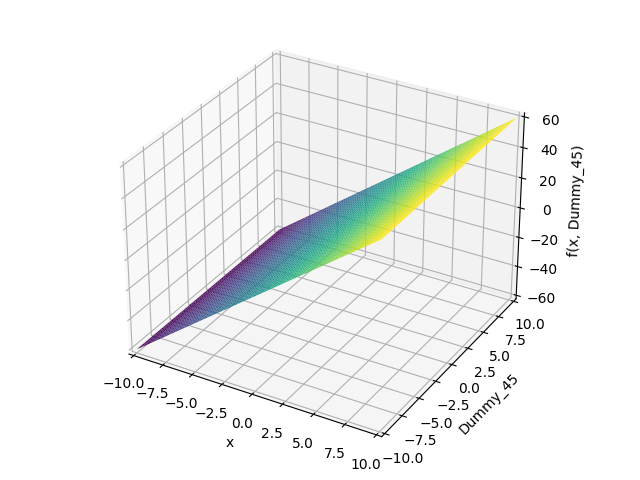

In [200]:
sm.plotting.plot3d(BJ[0])